Relational data warehouses are at the center of most enterprise business intelligence (BI) solutions. While the specific details may vary across data warehouse implementations, a common pattern based on a denormalized, multidimensional schema has emerged as the standard design for a relational data warehouse.

Azure Synapse Analytics includes a highly scalable relational database engine that is optimized for data warehousing workloads. By using dedicated SQL pools in Azure Synapse Analytics, you can create databases that are capable of hosting and querying huge volumes of data in relational tables.

### Design a data warehouse schema

A common pattern for relational data warehouses is to define a schema that includes two kinds of table: dimension tables and fact tables.

#### Dimension Tables

* Surrogate key that is specific to the data warehouse and uniquely identifies each row in the dimension table in the data warehouse - usually an incrementing integer number.
* Alternate key, often a natural or business key that is used to identify a specific instance of an entity in the transactional source system from which the entity record originated - such as a product code or a customer ID.


#### Indexes

While Synapse Analytics dedicated SQL pools support clustered indexes as found in SQL Server,<b> the default index type is clustered columnstore</b>. This index type offers a significant performance advantage when querying large quantities of data in a typical data warehouse schema and should be used where possible. However, some tables may include data types that can't be included in a clustered columnstore index (for example, VARBINARY(MAX)), in which case a clustered index can be used instead.

####  Distribution
Azure Synapse Analytics dedicated SQL pools use a massively parallel processing (MPP) architecture, as opposed to the symmetric multiprocessing (SMP) architecture used in most OLTP database systems. In an MPP system, the data in a table is distributed for processing across a pool of nodes. Synapse Analytics supports the following kinds of distribution:

* Hash: A deterministic hash value is calculated for the specified column and used to assign the row to a compute node.
* Round-robin: Rows are distributed evenly across all compute nodes.
* Replicated: A copy of the table is stored on each compute node.

The table type often determines which option to choose for distributing the table.

<div>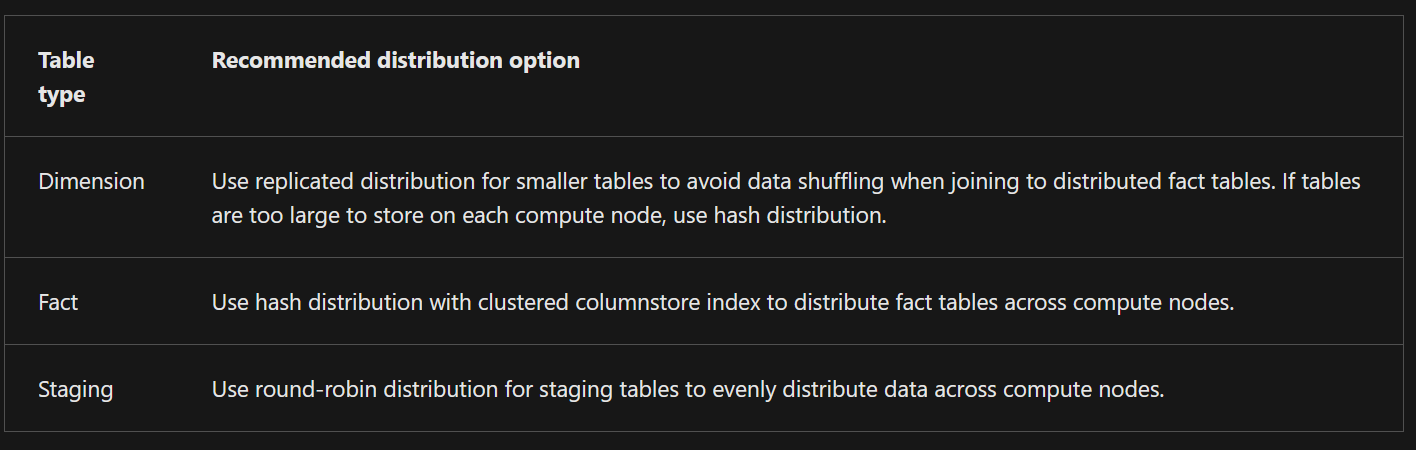</div>

### Creating Dimension Tables

In [ ]:
CREATE TABLE dbo.DimCustomer
(
    CustomerKey INT IDENTITY NOT NULL,
    CustomerAlternateKey NVARCHAR(15) NULL,
    CustomerName NVARCHAR(80) NOT NULL,
    EmailAddress NVARCHAR(50) NULL,
    Phone NVARCHAR(25) NULL,
    StreetAddress NVARCHAR(100),
    City NVARCHAR(20),
    PostalCode NVARCHAR(10),
    CountryRegion NVARCHAR(20)
)
WITH
(
    DISTRIBUTION = REPLICATE,
    CLUSTERED COLUMNSTORE INDEX
);